# Classification of income class

This [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) was collected in 1994. It contains information about citizens socio-economic attributes such as race, marital status, education... The target variable is a discretization of the income whether it is over 50k or under/equal to 50k US dollars. It is worth mentioned that some conditions were imposed over the population to gather the data such as age greater than 16 years old. 

In [15]:
# Data manipulation libraries
import pandas as pd
import numpy as np
# Visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# import adult dataset from UCI ml repository
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(data_url, encoding='utf8')

In [3]:
# display some rows
adults.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# dataset size
print(f'(rows,columns) = {adults.shape}')

(rows,columns) = (32560, 15)


In [5]:
# refactor of column names
# finalWeight: estimated number of citizens for that row
adults.columns = ['age', 'class', 'finalWeight', 'edu','eduNum','status','job'
                  ,'relationship','race','sex','gain','loss','hours','native','target']
adults.head()

,age,class,finalWeight,edu,eduNum,status,job,relationship,race,sex,gain,loss,hours,native,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Assumptions: 

- Young adults, in average, are expected to earn less money (because thay have less experience) than older adults. 
- Highly educated adults are expected to earn more money than less educated adults.
- marital status and relantionship has influence over target?.
- white people are expected to earn more, in average. 
- Males are expected to earn more, in average.

Education and eduNum, status and relantionship may be the strongest predictors. It is probably good to check correlation between those predictors and sex,race. Moreover, other hidden interaction effects. 

## Cleaning

Before a preliminar analysis, na values and categorical variables should be transformed. Only 'EduNum' and 'hours' are continuo. However, the cardinality of the variables is low therefore one hot encoding may be good enough. 

In [6]:
adults.dropna(axis=0, inplace=True, how='any')
# dataset size
print(f'(rows,columns) = {adults.shape}')

count      32560.00
mean      189781.81
std       105549.76
min        12285.00
25%       117831.50
50%       178363.00
75%       237054.50
max      1484705.00
Name: finalWeight, dtype: float64


[(10000.0, 800000.0)]

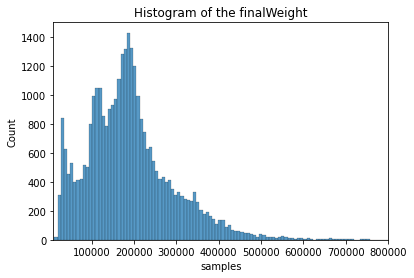

In [24]:
# Make sure there is enough data for each row
print(round(adults['finalWeight'].describe(),2)) # displays statistics

ax_fw = sns.histplot(data=adults, x='finalWeight')
ax_fw.set_title('Histogram of the finalWeight')
ax_fw.set_xlabel('samples')
ax_fw.set(xlim=(10**4,8*10**5))

In [ ]:
# clean not frequent status data
# TO - DO remove trailing spaces with strip
status = adults['status'].unique()
to_remove = [' Married-spouse-absent',' Married-AF-spouse']
clean_status = set(status)-set(to_remove)
print(clean_status)

In [ ]:
adults_rm_status = adults[adults.status.isin(list(clean_status))]

In [ ]:
# compare amount of males/females vs numEdu by male/female
data = adults_rm_status
category = 'sex'
feature = 'status'
# create 2 columns and 1 row grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(20,5))
# counts number of man and woman
sns.countplot(x=category, data=data, ax=axes[0])
# counts number of man and woman by year
sns.countplot(x=feature, hue=category, data=data, ax=axes[1])